<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DL-Pytorch/cnn-forward-propagation/CNN_Forward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np


In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='./root',
    train = True,
    download=True,
    transform = transforms.Compose([
        transform.ToTensor()
    ])
)


Extracting ./root/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./root/FashionMNIST/raw




Extracting ./root/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./root/FashionMNIST/raw




Extracting ./root/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./root/FashionMNIST/raw




Extracting ./root/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./root/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
len(train_set)

60000

In [8]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
sample = next(iter(train_set))
len(sample)

2

In [10]:
image, label = sample

In [11]:
image.shape

torch.Size([1, 28, 28])

In [13]:
label

9

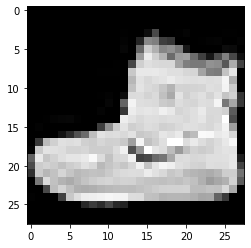

In [15]:
plt.imshow(image.squeeze(), cmap = "gray")

In [37]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 10
)

In [38]:
print(len(display_loader))

6000


In [17]:
batch = next(iter(display_loader))

In [18]:
images, labels = batch

In [19]:
print('types:', type(images), type(labels))
print('Shape:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
Shape: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [20]:
images[1].shape

torch.Size([1, 28, 28])

In [21]:
labels[1]

tensor(0)

torch.Size([3, 32, 302])
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


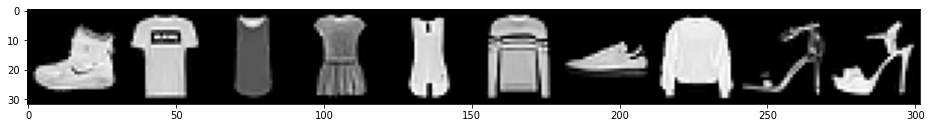

In [27]:
grid = torchvision.utils.make_grid(images, nrow = 10)
print(grid.shape)
plt.figure(figsize=(16,16))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [33]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 1, shuffle = True
)

print(len(train_loader))

60000


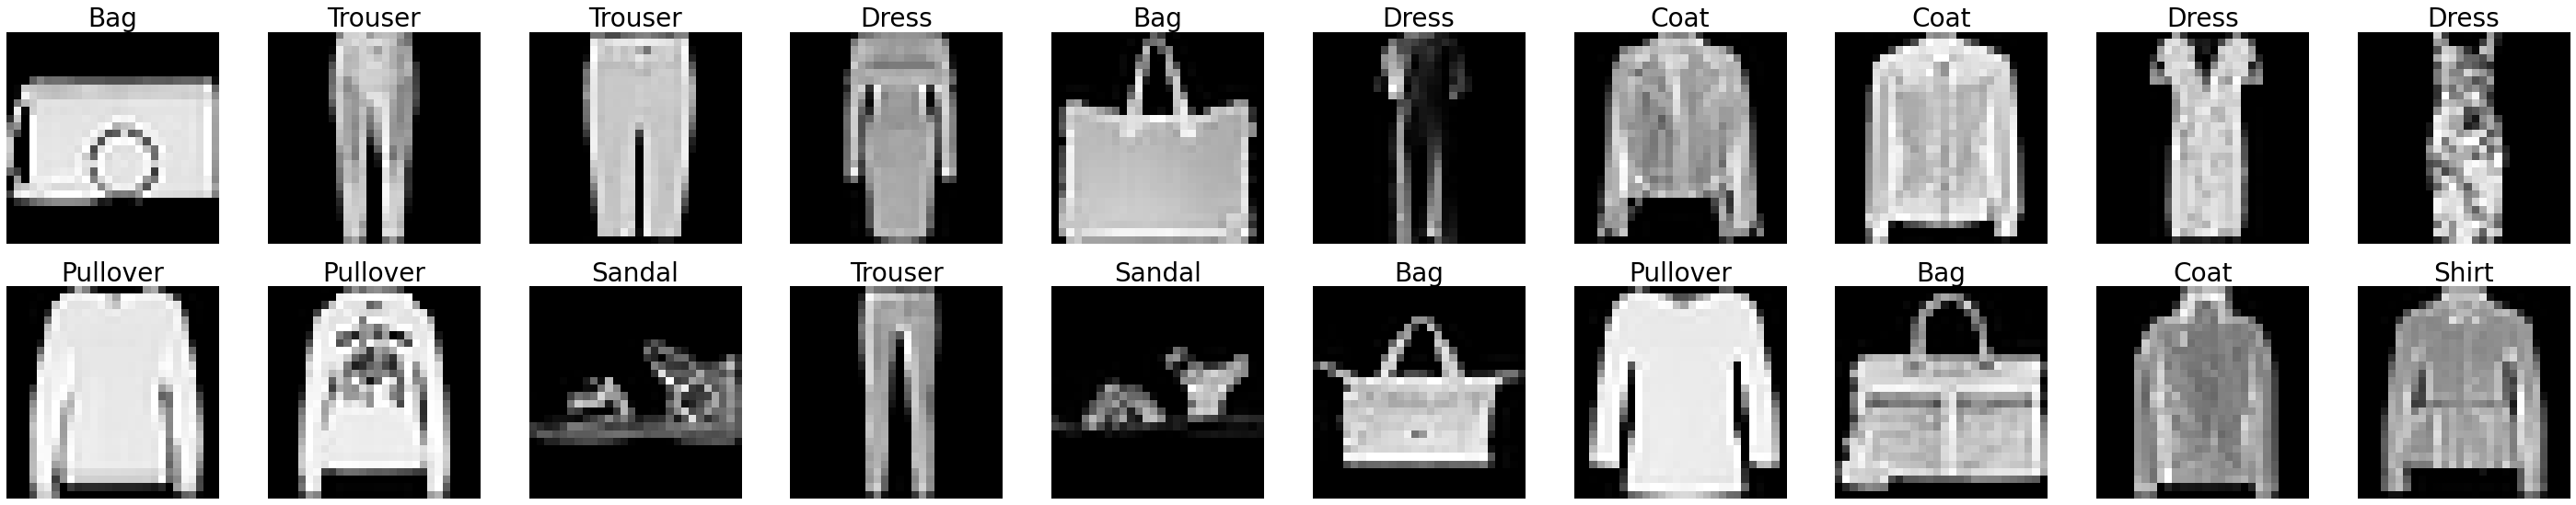

In [29]:


plt.figure(figsize=(50,50))
for i,batch in enumerate(train_loader, start=1):
  image, label = batch
  plt.subplot(10,10,i)
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title(train_set.classes[label.item()], fontsize = 28)
  if (i >= how_many_to_plot): break
plt.show()

In [65]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self,t):
    t = F.relu(self.conv1(t))
    t = F.max_pool2d(t, kernel_size=2, stride=2)
        
    t = F.relu(self.conv2(t))
    t = F.max_pool2d(t, kernel_size=2, stride=2)
        
    t = F.relu(self.fc1(t.reshape(-1, 12*4*4)))
    t = F.relu(self.fc2(t))
    t = self.out(t)

    return t
 

In [66]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [67]:
torch.set_grad_enabled(False)

In [68]:
sample = next(iter(train_set))
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [71]:
pred = network(image.unsqueeze(0))
pred

tensor([[ 0.0242, -0.0199, -0.1305,  0.0570,  0.0986, -0.0165, -0.0167, -0.0665,
         -0.0412,  0.0611]])

In [63]:
label

9

In [72]:
pred.argmax(dim=1)

tensor([4])

In [73]:
F.softmax(pred, dim=1)

tensor([[0.1028, 0.0983, 0.0880, 0.1062, 0.1107, 0.0987, 0.0986, 0.0938, 0.0962,
         0.1066]])

In [75]:
F.softmax(pred, dim = 1).sum()

tensor(1.0000)